In [2]:
#import bibliotek
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

%matplotlib inline

In [3]:
#wczytanie danych
df = pd.read_csv('https://raw.githubusercontent.com/aczepielik/KRKtram/master/reports/report_07-23.csv')
df.head()

,index,time_stamp,stop,stopName,number,direction,plannedTime,vehicleId,tripId,status,delay,seq_num
0,1,2018-07-23 06:00:45,378,Os.Piastów,21,Kopiec Wandy,2018-07-23 05:59:00,NaN,6351558574044883205,PLANNED,1,1.0
1,1,2018-07-23 06:00:47,612,Borsucza,22,Walcownia,2018-07-23 06:00:00,6.352185e+18,6351558574044899587,STOPPING,0,7.0
2,1,2018-07-23 06:00:48,572,Smolki,11,Czerwone Maki P+R,2018-07-23 06:00:00,6.352185e+18,6351558574044670211,STOPPING,0,10.0
3,1,2018-07-23 06:00:49,319,Jubilat,1,Wzgórza K.,2018-07-23 05:59:00,NaN,6351558574044363010,PLANNED,1,3.0
4,1,2018-07-23 06:00:49,322,Filharmonia,8,Bronowice Małe,2018-07-23 06:01:00,6.352185e+18,6351558574044592386,STOPPING,0,15.0


In [4]:
#przykaldowy trpid
df[df.tripId == 6351558574044883205]

,index,time_stamp,stop,stopName,number,direction,plannedTime,vehicleId,tripId,status,delay,seq_num
0,1,2018-07-23 06:00:45,378,Os.Piastów,21,Kopiec Wandy,2018-07-23 05:59:00,NaN,6351558574044883205,PLANNED,1,1.0
70,3,2018-07-23 06:01:42,379,Piasta Kołodzieja,21,Kopiec Wandy,2018-07-23 06:00:00,NaN,6351558574044883205,PLANNED,1,2.0
135,6,2018-07-23 06:02:46,382,Kleeberga,21,Kopiec Wandy,2018-07-23 06:01:00,NaN,6351558574044883205,PLANNED,1,3.0
284,12,2018-07-23 06:04:54,388,Dunikowskiego,21,Kopiec Wandy,2018-07-23 06:03:00,NaN,6351558574044883205,PLANNED,1,4.0
414,17,2018-07-23 06:06:40,2539,Rondo Hipokratesa,21,Kopiec Wandy,2018-07-23 06:05:00,NaN,6351558574044883205,PLANNED,1,5.0
493,20,2018-07-23 06:07:43,392,DH Wanda,21,Kopiec Wandy,2018-07-23 06:06:00,NaN,6351558574044883205,PLANNED,1,6.0
697,28,2018-07-23 06:10:39,2745,Rondo Kocmyrzowskie im. Ks. Gorzelanego,21,Kopiec Wandy,2018-07-23 06:09:00,NaN,6351558574044883205,PLANNED,1,7.0
772,31,2018-07-23 06:11:43,418,Os.Zgody,21,Kopiec Wandy,2018-07-23 06:10:00,NaN,6351558574044883205,PLANNED,1,8.0
1007,40,2018-07-23 06:14:58,2744,Plac Centralny im. R.Reagana,21,Kopiec Wandy,2018-07-23 06:13:00,NaN,6351558574044883205,PLANNED,1,9.0
1137,45,2018-07-23 06:16:49,423,Struga,21,Kopiec Wandy,2018-07-23 06:15:00,NaN,6351558574044883205,PLANNED,1,10.0


In [7]:
#rozklad wartosci delay
df.delay.value_counts()

0     30531
1     24653
2      8833
3      4004
4      1818
5       816
6       347
7       190
8        85
9        62
10       42
14       36
12       34
11       25
13       24
15       11
16        3
19        2
18        1
Name: delay, dtype: int64

In [8]:
#normalizacja wartosci delay
df.delay.value_counts(normalize=True)

0     0.426905
1     0.344715
2     0.123509
3     0.055987
4     0.025421
5     0.011410
6     0.004852
7     0.002657
8     0.001189
9     0.000867
10    0.000587
14    0.000503
12    0.000475
11    0.000350
13    0.000336
15    0.000154
16    0.000042
19    0.000028
18    0.000014
Name: delay, dtype: float64

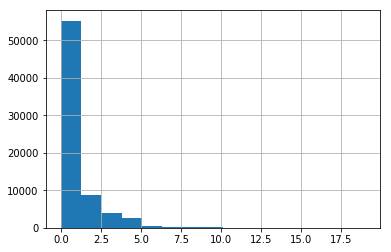

In [9]:
#histogram
df.delay.hist(bins=15);

In [10]:
#podstawowe informacje statystyczne
df.delay.describe()

count    71517.000000
mean         1.014039
std          1.357324
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max         19.000000
Name: delay, dtype: float64

In [11]:
###########################################################################################################
#modele
X = df [['number']].values
y = df ['delay'].values

model = DecisionTreeRegressor(max_depth=10)
cross_val_score(model,X,y,cv=3,scoring='neg_mean_absolute_error')

scores = cross_val_score(model,X,y,cv=3,scoring='neg_mean_absolute_error')

np.mean(scores), np.std(scores)

(-0.9127585343839395, 0.05389454602788386)

In [21]:
###########################################################################################################
#modele
X = df [['number','stop']].values
y = df ['delay'].values

model = DecisionTreeRegressor(max_depth=10)
cross_val_score(model,X,y,cv=3,scoring='neg_mean_absolute_error')

scores = cross_val_score(model,X,y,cv=3,scoring='neg_mean_absolute_error')

np.mean(scores), np.std(scores)

(-0.8847735284012028, 0.053418310992349304)

In [34]:
###########################################################################################################
#opytmalizcja o:
# - delay na sek
# - direction

#df ['delay_secs'] = df ['delay'].map(lambda x: x*60)
df ['direction_cat'] = df ['direction'].factorize()[0]

X = df [['number','stop','direction_cat']].values
y = df ['delay'].values

model = DecisionTreeRegressor(max_depth=10)
cross_val_score(model,X,y,cv=3,scoring='neg_mean_absolute_error')

scores = cross_val_score(model,X,y,cv=3,scoring='neg_mean_absolute_error')

np.mean(scores), np.std(scores) 


(-0.8539075591716229, 0.05017803452585478)

In [36]:
###########################################################################################################
#opytmalizcja o:
# - delay na sek
# - direction
# - vehicleId

df ['delay_secs'] = df ['delay'].map(lambda x: x*60)
df ['direction_cat'] = df ['direction'].factorize()[0]
df ['vehicleId'].fillna(-1, inplace = True)

X = df [['number','stop','direction_cat','vehicleId']].values
y = df ['delay_secs'].values

model = DecisionTreeRegressor(max_depth=10)
cross_val_score(model,X,y,cv=3,scoring='neg_mean_absolute_error')

scores = cross_val_score(model,X,y,cv=3,scoring='neg_mean_absolute_error')

np.mean(scores), np.std(scores)

(-50.51034820337768, 3.165855326444473)

In [38]:
###########################################################################################################
#opytmalizcja o:
# - delay na sek
# - direction
# - vehicleId
# - seq_num

df ['delay_secs'] = df ['delay'].map(lambda x: x*60)
df ['direction_cat'] = df ['direction'].factorize()[0]
df ['vehicleId'].fillna(-1, inplace = True)
df ['seq_num'].fillna(-1, inplace = True)


X = df [['number','stop','direction_cat','vehicleId','seq_num']].values
y = df ['delay_secs'].values

model = DecisionTreeRegressor(max_depth=10)
cross_val_score(model,X,y,cv=3,scoring='neg_mean_absolute_error')

scores = cross_val_score(model,X,y,cv=3,scoring='neg_mean_absolute_error')

np.mean(scores), np.std(scores)

(-48.8773357642232, 2.531325760742656)

In [51]:
###########################################################################################################
#opytmalizcja o:
# - delay na sek
# - direction
# - vehicleId
# - seq_num
# - number_direction_id
# -stop_direction_id

df ['delay_secs'] = df ['delay'].map(lambda x: x*60)
df ['direction_cat'] = df ['direction'].factorize()[0]
df ['vehicleId'].fillna(-1, inplace = True)
df ['seq_num'].fillna(-1, inplace = True)

def gen_id_num_direction(x):
	return '{} {}'.format( x['number'], x['direction'])

#df.apply(lambda x: '{} {}'.format( x[number], x[direction] ),axis =1).factorize[](0)
df ['number_direction_id'] = df.apply(gen_id_num_direction,axis =1).factorize()[0]


def gen_id_stop_direction(x):
	return '{} {}'.format( x['stop'], x['direction'])
#df.apply(lambda x: '{} {}'.format( x[stop], x[direction] ),axis =1).factorize[](0)
df ['stop_direction_id'] = df.apply(gen_id_stop_direction,axis =1).factorize()[0]


feats = [
'number',
'stop',
'direction_cat',
'vehicleId',
'seq_num',
'stop_direction_id',
'number_direction_id'
]
X = df [feats].values
y = df ['delay_secs'].values
#model = RandomForestRegressor(max_depth=10,n_estimators=50)
model = DecisionTreeRegressor(max_depth=10,random_state=0)

cross_val_score(model,X,y,cv=3,scoring='neg_mean_absolute_error')

cores = cross_val_score(model,X,y,cv=3,scoring='neg_mean_absolute_error')

np.mean(scores), np.std(scores)

(-48.8773357642232, 2.531325760742656)